In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt

# Load wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

#print("Shape of dataset:", X.shape)
#X.head()


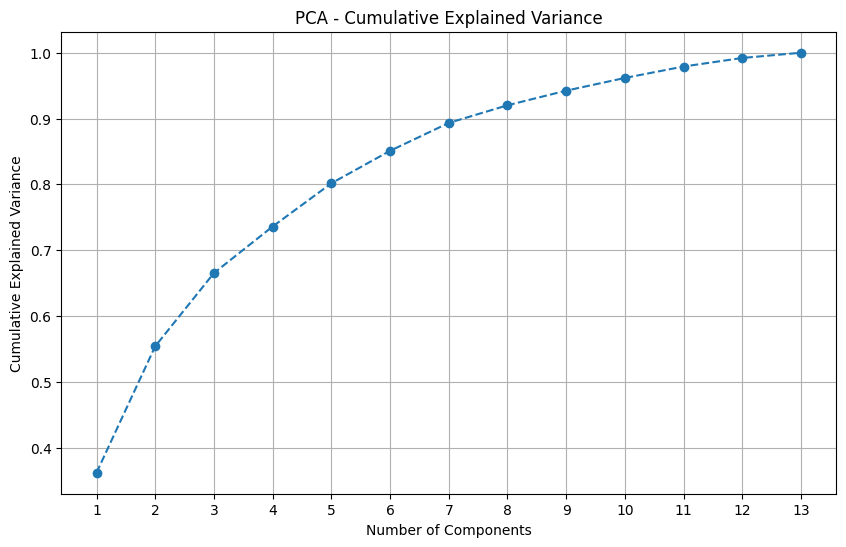

In [2]:
##✅ Plot Explained Variance Ratio
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Fit PCA
pca = PCA()
pca.fit(X_scaled)

# Step 3: Plot explained variance
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_var) + 1), cumulative_var, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.xticks(range(1, len(explained_var) + 1))
plt.show()


In [3]:
from sklearn.decomposition import PCA

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Show new shape
print("Original shape:", X_scaled.shape)
print("Transformed shape:", X_pca.shape)


Original shape: (178, 13)
Transformed shape: (178, 2)


In [4]:
X_pca

array([[ 3.31675081,  1.44346263],
       [ 2.20946492, -0.33339289],
       [ 2.51674015,  1.0311513 ],
       [ 3.75706561,  2.75637191],
       [ 1.00890849,  0.86983082],
       [ 3.05025392,  2.12240111],
       [ 2.44908967,  1.17485013],
       [ 2.05943687,  1.60896307],
       [ 2.5108743 ,  0.91807096],
       [ 2.75362819,  0.78943767],
       [ 3.47973668,  1.30233324],
       [ 1.7547529 ,  0.61197723],
       [ 2.11346234,  0.67570634],
       [ 3.45815682,  1.13062988],
       [ 4.31278391,  2.09597558],
       [ 2.3051882 ,  1.66255173],
       [ 2.17195527,  2.32730534],
       [ 1.89897118,  1.63136888],
       [ 3.54198508,  2.51834367],
       [ 2.0845222 ,  1.06113799],
       [ 3.12440254,  0.78689711],
       [ 1.08657007,  0.24174355],
       [ 2.53522408, -0.09184062],
       [ 1.64498834, -0.51627893],
       [ 1.76157587, -0.31714893],
       [ 0.9900791 ,  0.94066734],
       [ 1.77527763,  0.68617513],
       [ 1.23542396, -0.08980704],
       [ 2.18840633,

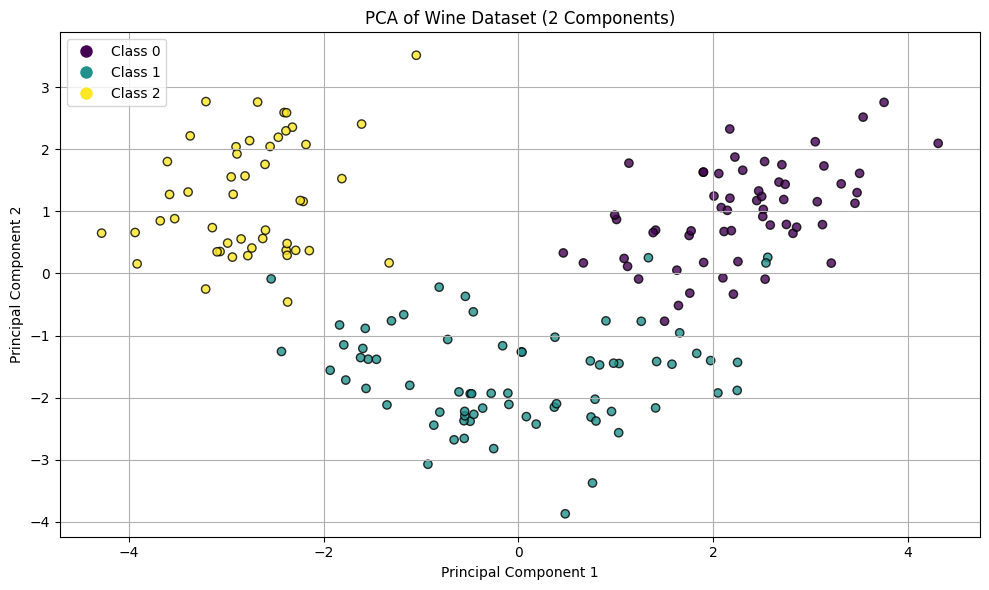

In [5]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=y, cmap='viridis', edgecolor='k', alpha=0.8
)

# Labels
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset (2 Components)')
plt.grid(True)

# Add legend
legend_labels = ['Class 0', 'Class 1', 'Class 2']
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markerfacecolor=plt.cm.viridis(i / 2), markersize=10)
           for i, label in enumerate(legend_labels)]
plt.legend(handles=handles)
plt.tight_layout()
plt.show()


In [6]:
# Reduce to 3 principal components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

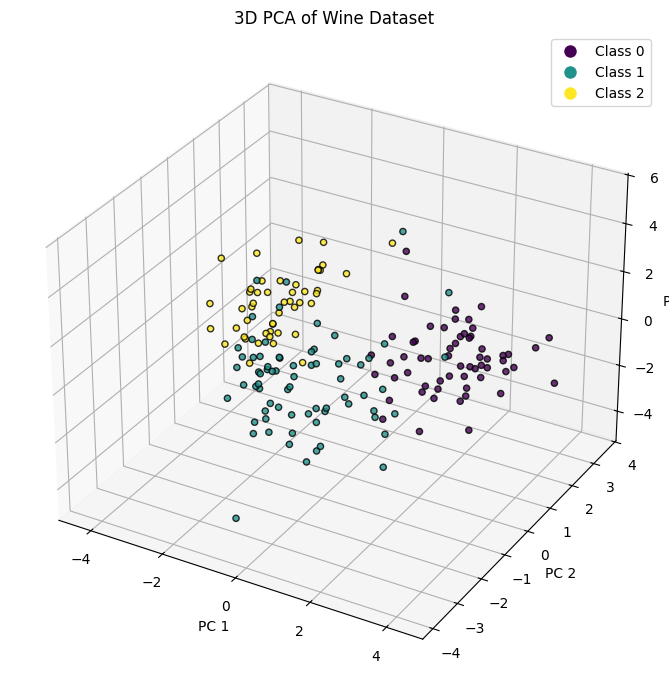

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter
scatter = ax.scatter(
    X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
    c=y, cmap='viridis', edgecolor='k', alpha=0.8
)

# Labels
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('3D PCA of Wine Dataset')

# Legend
legend_labels = ['Class 0', 'Class 1', 'Class 2']
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markerfacecolor=plt.cm.viridis(i / 2), markersize=10)
           for i, label in enumerate(legend_labels)]
ax.legend(handles=handles, loc='best')

plt.tight_layout()
plt.show()

In [8]:
import plotly.express as px

# Apply PCA with 3 components
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_scaled)

# Convert to DataFrame
df_pca = pd.DataFrame(X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
df_pca['target'] = y

# Interactive 3D plot
fig = px.scatter_3d(
    df_pca, x='PC1', y='PC2', z='PC3',
    color=df_pca['target'].astype(str),
    title='Interactive 3D PCA of Wine Dataset',
    labels={'color': 'Class'},
    opacity=0.8
)

fig.show()
